# Data Wrangling Project - Data Preparation, Web Scraping, API and SQLite3

Logan Quandt

In [1]:
import numpy as np
import pandas as pd
from bs4 import BeautifulSoup
import bs4
import re
import requests
import json
import os
import urllib.request
import glom
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3

In [151]:
#load in dataframe for flat file
gdp_df = pd.read_csv('/Users/logan/Documents/GitHub/DSC540/Final Project/gdp.csv')
gdp_df.head(5)

,Country Name,Code,1960,1961,1962,1963,1964,1965,1966,1967,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,Unnamed: 65
0,Aruba,ABW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN,NaN
1,Africa Eastern and Southern,AFE,1.931311e+10,1.972349e+10,2.149392e+10,2.573321e+10,2.352744e+10,2.681057e+10,2.915216e+10,3.017317e+10,...,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11,NaN
2,Afghanistan,AFG,5.377778e+08,5.488889e+08,5.466667e+08,7.511112e+08,8.000000e+08,1.006667e+09,1.400000e+09,1.673333e+09,...,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10,NaN
3,Africa Western and Central,AFW,1.040428e+10,1.112805e+10,1.194335e+10,1.267652e+10,1.383858e+10,1.486247e+10,1.583285e+10,1.442643e+10,...,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11,NaN
4,Angola,AGO,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10,NaN


In [152]:
#slice dataframe for country name, code and more recent years to get more update to date data and limit NaNs
gdp_df_names = gdp_df[gdp_df.columns[0:2]]
gdp_df_years = gdp_df[gdp_df.columns[42:63]]

In [153]:
#merge dataframe slices back into one dataframe
gdp_df = pd.concat([gdp_df_names, gdp_df_years], axis=1)
gdp_df

,Country Name,Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,"Yemen, Rep.",YEM,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


In [154]:
#rename headers to more accurately reflect the data and better align with other data sources
gdp_df = gdp_df.rename(columns = {'Country Name': 'Country (or dependency)', 'Code': 'Country Code'})
gdp_df

,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,Aruba,ABW,1.873453e+09,1.920112e+09,1.941341e+09,2.021229e+09,2.228492e+09,2.330726e+09,2.424581e+09,2.615084e+09,...,2.549721e+09,2.534637e+09,2.727850e+09,2.790849e+09,2.962905e+09,2.983637e+09,3.092430e+09,3.202189e+09,NaN,NaN
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
262,"Yemen, Rep.",YEM,9.652436e+09,9.861560e+09,1.069463e+10,1.177797e+10,1.387279e+10,1.674634e+10,1.906198e+10,2.165053e+10,...,3.272642e+10,3.540134e+10,4.041524e+10,4.322859e+10,4.244510e+10,3.131737e+10,2.684013e+10,2.160614e+10,NaN,NaN
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


<AxesSubplot:xlabel='2020'>

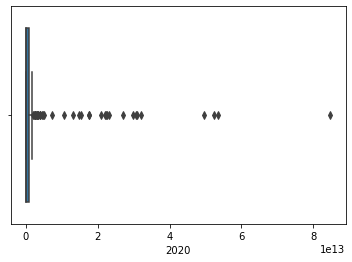

In [155]:
#visualize outliers
sns.boxplot(x=gdp_df['2020'])

In [156]:
#find outliers using describe
gdp_df.describe()

,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
count,2.470000e+02,2.480000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.530000e+02,2.540000e+02,2.540000e+02,2.550000e+02,2.550000e+02,...,2.580000e+02,2.570000e+02,2.580000e+02,2.580000e+02,2.570000e+02,2.560000e+02,2.560000e+02,2.560000e+02,2.530000e+02,2.420000e+02
mean,1.009237e+12,1.002668e+12,1.021573e+12,1.153249e+12,1.311269e+12,1.437369e+12,1.572270e+12,1.801685e+12,2.003418e+12,1.902177e+12,...,2.333419e+12,2.405010e+12,2.482543e+12,2.553374e+12,2.407493e+12,2.447400e+12,2.620694e+12,2.786905e+12,2.864964e+12,2.892666e+12
std,3.962904e+12,3.932082e+12,4.055709e+12,4.552519e+12,5.101094e+12,5.463377e+12,5.849805e+12,6.535266e+12,7.097259e+12,6.710968e+12,...,7.991609e+12,8.162961e+12,8.388441e+12,8.616240e+12,8.171350e+12,8.321991e+12,8.852537e+12,9.425221e+12,9.620595e+12,9.530218e+12
min,1.374206e+07,1.319654e+07,1.545099e+07,1.823108e+07,2.153493e+07,2.183910e+07,2.290286e+07,2.703037e+07,3.029022e+07,2.710108e+07,...,3.871181e+07,3.767177e+07,3.750908e+07,3.729061e+07,3.549207e+07,3.654780e+07,4.061925e+07,4.258816e+07,4.727146e+07,4.885555e+07
25%,3.058488e+09,3.074393e+09,3.106500e+09,3.503723e+09,4.137914e+09,4.868136e+09,5.372199e+09,5.949065e+09,6.786746e+09,6.686452e+09,...,8.106591e+09,8.709165e+09,8.747774e+09,9.297231e+09,8.738203e+09,8.666853e+09,9.565595e+09,1.046233e+10,1.131495e+10,1.204996e+10
50%,1.657753e+10,1.586296e+10,1.640285e+10,1.878172e+10,2.232240e+10,2.440579e+10,2.705267e+10,3.270030e+10,3.850386e+10,3.738812e+10,...,4.687279e+10,4.658046e+10,4.981676e+10,5.114388e+10,5.006595e+10,4.886913e+10,5.332271e+10,5.614404e+10,6.113687e+10,6.212830e+10
75%,2.017524e+11,1.984412e+11,1.990721e+11,2.288585e+11,2.587423e+11,3.105543e+11,3.628256e+11,4.302955e+11,5.155571e+11,4.519055e+11,...,5.521483e+11,5.524837e+11,5.447092e+11,5.456266e+11,5.051038e+11,5.261238e+11,5.666712e+11,5.634445e+11,5.972806e+11,7.441747e+11
max,3.381597e+13,3.360921e+13,3.488437e+13,3.912864e+13,4.409586e+13,4.777398e+13,5.176942e+13,5.832135e+13,6.401446e+13,6.073036e+13,...,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13,8.756805e+13,8.474698e+13


In [157]:
# find count of countries with 2020 data in bottom 25%
print(len(gdp_df.loc[gdp_df['2020'] < 3058488000]))

32


In [158]:
#filter out bottom 25% of data, keeping upper 25% as these are likely large countries we want to include
gdp_df = gdp_df.loc[gdp_df['2020'] >= 3058488000]
gdp_df

,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,9.747880e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
5,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
259,World,WLD,3.381597e+13,3.360921e+13,3.488437e+13,3.912864e+13,4.409586e+13,4.777398e+13,5.176942e+13,5.832135e+13,...,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13,8.756805e+13,8.474698e+13
261,Kosovo,XKX,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6.341737e+09,6.163785e+09,6.735731e+09,7.074658e+09,6.295820e+09,6.682833e+09,7.180813e+09,7.878509e+09,7.899879e+09,7.716925e+09
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


In [159]:
#use isna() to find number of NaNs in each column
gdp_df.isna().sum()

Country (or dependency)    0
Country Code               0
2000                       5
2001                       5
2002                       3
2003                       3
2004                       3
2005                       3
2006                       2
2007                       2
2008                       1
2009                       1
2010                       1
2011                       1
2012                       1
2013                       0
2014                       0
2015                       0
2016                       0
2017                       0
2018                       0
2019                       0
2020                       0
dtype: int64

In [160]:
#drop all NA records
gdp_df.dropna()

,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,2007,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,6.612422e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,4.617776e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,6.526645e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
5,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,1.067732e+10,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10
7,Arab World,ARB,8.160388e+11,7.985250e+11,8.031423e+11,8.878742e+11,1.056272e+12,1.297924e+12,1.533188e+12,1.789560e+12,...,2.501780e+12,2.740553e+12,2.799579e+12,2.831681e+12,2.463580e+12,2.411981e+12,2.466443e+12,2.730780e+12,2.776469e+12,2.447584e+12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
257,Vietnam,VNM,3.117252e+10,3.268520e+10,3.506411e+10,3.955251e+10,4.542785e+10,5.763326e+10,6.637166e+10,7.741443e+10,...,1.355394e+11,1.558200e+11,1.712220e+11,1.862047e+11,1.932411e+11,2.052762e+11,2.237799e+11,2.452137e+11,2.619212e+11,2.711584e+11
259,World,WLD,3.381597e+13,3.360921e+13,3.488437e+13,3.912864e+13,4.409586e+13,4.777398e+13,5.176942e+13,5.832135e+13,...,7.365375e+13,7.531228e+13,7.743951e+13,7.955766e+13,7.511244e+13,7.630506e+13,8.119329e+13,8.626760e+13,8.756805e+13,8.474698e+13
263,South Africa,ZAF,1.517534e+11,1.354296e+11,1.290881e+11,1.970202e+11,2.558066e+11,2.888685e+11,3.038609e+11,3.330755e+11,...,4.582015e+11,4.344005e+11,4.008860e+11,3.811989e+11,3.467098e+11,3.235855e+11,3.814488e+11,4.048421e+11,3.879346e+11,3.354421e+11
264,Zambia,ZMB,3.600683e+09,4.094481e+09,4.193846e+09,4.901840e+09,6.221078e+09,8.331870e+09,1.275686e+10,1.405696e+10,...,2.345952e+10,2.550306e+10,2.803724e+10,2.714102e+10,2.125122e+10,2.095841e+10,2.587360e+10,2.631159e+10,2.330867e+10,1.811063e+10


In [161]:
#use duplicated and any to find if there are any duplicates in the dataframe
for columns in gdp_df:
    if any(gdp_df[columns].duplicated()):
        print('There are duplicates in', str(columns))
    else:
        print('There are no duplicates in', str(columns))

There are no duplicates in Country (or dependency)
There are no duplicates in Country Code
There are duplicates in 2000
There are duplicates in 2001
There are duplicates in 2002
There are duplicates in 2003
There are duplicates in 2004
There are duplicates in 2005
There are duplicates in 2006
There are duplicates in 2007
There are duplicates in 2008
There are duplicates in 2009
There are duplicates in 2010
There are duplicates in 2011
There are duplicates in 2012
There are duplicates in 2013
There are duplicates in 2014
There are duplicates in 2015
There are duplicates in 2016
There are duplicates in 2017
There are duplicates in 2018
There are duplicates in 2019
There are duplicates in 2020


In [162]:
duplicatecheck = gdp_df.duplicated(subset = ['2020'], keep=False)
print(gdp_df[duplicatecheck])

                       Country (or dependency) Country Code          2000  \
204                                 South Asia          SAS  6.304291e+11   
217                         Sub-Saharan Africa          SSF  4.230878e+11   
240                    South Asia (IDA & IBRD)          TSA  6.304291e+11   
241  Sub-Saharan Africa (IDA & IBRD countries)          TSS  4.230878e+11   

             2001          2002          2003          2004          2005  \
204  6.458701e+11  6.776275e+11  7.910027e+11  9.170893e+11  1.050585e+12   
217  4.059833e+11  4.412977e+11  5.561881e+11  6.915319e+11  8.213391e+11   
240  6.458701e+11  6.776275e+11  7.910027e+11  9.170893e+11  1.050585e+12   
241  4.059833e+11  4.412977e+11  5.561881e+11  6.915319e+11  8.213391e+11   

             2006          2007  ...          2011          2012  \
204  1.196088e+12  1.504193e+12  ...  2.274546e+12  2.300090e+12   
217  9.682409e+11  1.121981e+12  ...  1.614001e+12  1.677883e+12   
240  1.196088e+12  1.504

Not removing duplicates due to them being GDPs that were the same by coincidence or different regions with different values

In [163]:
#check data types to see if there are columns I need to change types on
gdp_df.dtypes

Country (or dependency)     object
Country Code                object
2000                       float64
2001                       float64
2002                       float64
2003                       float64
2004                       float64
2005                       float64
2006                       float64
2007                       float64
2008                       float64
2009                       float64
2010                       float64
2011                       float64
2012                       float64
2013                       float64
2014                       float64
2015                       float64
2016                       float64
2017                       float64
2018                       float64
2019                       float64
2020                       float64
dtype: object

In [164]:
#open html document from https://www.worldometers.info/world-population/population-by-country/
with open('Population by Country (2022) - Worldometer.html', 'r', encoding = 'utf-8') as web_page:
    soup = BeautifulSoup(web_page)
    web_page.close()

In [165]:
#find number of tables
tables = soup.find_all('table')
print('Total Number of Tables:', len(tables))

Total Number of Tables: 1


In [166]:
#printing out table to view class
print(tables)

[<table cellspacing="0" class="table table-striped table-bordered" id="example2" width="100%"> <thead> <tr> <th>#</th> <th>Country (or dependency)</th> <th>Population<br/> (2020)</th> <th>Yearly<br/> Change</th> <th>Net<br/> Change</th> <th>Density<br/> (P/Km²)</th> <th>Land Area<br/> (Km²)</th> <th>Migrants<br/> (net)</th> <th>Fert.<br/> Rate</th> <th>Med.<br/> Age</th> <th>Urban<br/> Pop %</th> <th>World<br/> Share</th> </tr> </thead> <tbody> <tr> <td>1</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/china-population/">China</a></td> <td style="font-weight: bold;">1,439,323,776</td> <td>0.39 %</td> <td>5,540,090</td> <td>153</td> <td>9,388,211</td> <td>-348,399</td> <td>1.7</td> <td>38</td> <td>61 %</td> <td>18.47 %</td> </tr> <tr> <td>2</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td> <td style="font-weight: bold;">1,380,004,385</td> <td>0.99 %</td> <td>13,5

In [167]:
#find table
data_table = soup.find('table', {'class': "table table-striped table-bordered"})
type(data_table)

bs4.element.Tag

In [168]:
#find the rows from the table
rows1 = data_table.findAll('tbody')[0].findAll('tr')[0:]
print(rows1)

[<tr> <td>1</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/china-population/">China</a></td> <td style="font-weight: bold;">1,439,323,776</td> <td>0.39 %</td> <td>5,540,090</td> <td>153</td> <td>9,388,211</td> <td>-348,399</td> <td>1.7</td> <td>38</td> <td>61 %</td> <td>18.47 %</td> </tr>, <tr> <td>2</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/india-population/">India</a></td> <td style="font-weight: bold;">1,380,004,385</td> <td>0.99 %</td> <td>13,586,631</td> <td>464</td> <td>2,973,190</td> <td>-532,687</td> <td>2.2</td> <td>28</td> <td>35 %</td> <td>17.70 %</td> </tr>, <tr> <td>3</td> <td style="font-weight: bold; font-size:15px; text-align:left"><a href="/world-population/us-population/">United States</a></td> <td style="font-weight: bold;">331,002,651</td> <td>0.59 %</td> <td>1,937,734</td> <td>36</td> <td>9,147,420</td> <td>954,806</td> <td>1.8</td> <td>38</td> <td>83 %</td> <td>4.2

In [169]:
#get the data from the rows
data_rows1 = [[td.get_text().strip() for td in tr.findAll('td')] for tr in rows1]

In [170]:
#print data out to ensure it's populating correctly
print(data_rows1)

[['1', 'China', '1,439,323,776', '0.39 %', '5,540,090', '153', '9,388,211', '-348,399', '1.7', '38', '61 %', '18.47 %'], ['2', 'India', '1,380,004,385', '0.99 %', '13,586,631', '464', '2,973,190', '-532,687', '2.2', '28', '35 %', '17.70 %'], ['3', 'United States', '331,002,651', '0.59 %', '1,937,734', '36', '9,147,420', '954,806', '1.8', '38', '83 %', '4.25 %'], ['4', 'Indonesia', '273,523,615', '1.07 %', '2,898,047', '151', '1,811,570', '-98,955', '2.3', '30', '56 %', '3.51 %'], ['5', 'Pakistan', '220,892,340', '2.00 %', '4,327,022', '287', '770,880', '-233,379', '3.6', '23', '35 %', '2.83 %'], ['6', 'Brazil', '212,559,417', '0.72 %', '1,509,890', '25', '8,358,140', '21,200', '1.7', '33', '88 %', '2.73 %'], ['7', 'Nigeria', '206,139,589', '2.58 %', '5,175,990', '226', '910,770', '-60,000', '5.4', '18', '52 %', '2.64 %'], ['8', 'Bangladesh', '164,689,383', '1.01 %', '1,643,222', '1,265', '130,170', '-369,501', '2.1', '28', '39 %', '2.11 %'], ['9', 'Russia', '145,934,462', '0.04 %', '62

In [171]:
#separate headers from HTMl data
header1 = []
for hd in data_table.findAll('thead')[0].findAll('th'):
    header1.append(hd.getText().strip())
print(header1)

['#', 'Country (or dependency)', 'Population (2020)', 'Yearly Change', 'Net Change', 'Density (P/Km²)', 'Land Area (Km²)', 'Migrants (net)', 'Fert. Rate', 'Med. Age', 'Urban Pop %', 'World Share']


In [172]:
#load in dataset from HTML data
population_df = pd.DataFrame(data_rows1, columns = header1)
population_df

,#,Country (or dependency),Population (2020),Yearly Change,Net Change,Density (P/Km²),Land Area (Km²),Migrants (net),Fert. Rate,Med. Age,Urban Pop %,World Share
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %
...,...,...,...,...,...,...,...,...,...,...,...,...
230,231,Montserrat,"4,992",0.06 %,3,50,100,,N.A.,N.A.,10 %,0.00 %
231,232,Falkland Islands,"3,480",3.05 %,103,0,"12,170",,N.A.,N.A.,66 %,0.00 %
232,233,Niue,"1,626",0.68 %,11,6,260,,N.A.,N.A.,46 %,0.00 %
233,234,Tokelau,"1,357",1.27 %,17,136,10,,N.A.,N.A.,0 %,0.00 %


In [173]:
#set headers using set_axis
population_df = population_df.set_axis(['World Rank','Country (or dependency)', 'Population 2020', 'Yearly Change Percentage', 'Net Change', 'Density per KM^2', 'Country Size KM^2', 'Net Migration', 
                                       'Fertility Rate', 'Median Age', 'Urban Population Percentage', 'Share of World Population'], axis=1)
population_df.head()

,World Rank,Country (or dependency),Population 2020,Yearly Change Percentage,Net Change,Density per KM^2,Country Size KM^2,Net Migration,Fertility Rate,Median Age,Urban Population Percentage,Share of World Population
0,1,China,"1,439,323,776",0.39 %,"5,540,090",153,"9,388,211","-348,399",1.7,38,61 %,18.47 %
1,2,India,"1,380,004,385",0.99 %,"13,586,631",464,"2,973,190","-532,687",2.2,28,35 %,17.70 %
2,3,United States,"331,002,651",0.59 %,"1,937,734",36,"9,147,420","954,806",1.8,38,83 %,4.25 %
3,4,Indonesia,"273,523,615",1.07 %,"2,898,047",151,"1,811,570","-98,955",2.3,30,56 %,3.51 %
4,5,Pakistan,"220,892,340",2.00 %,"4,327,022",287,"770,880","-233,379",3.6,23,35 %,2.83 %


In [174]:
#use replace to fix problem characters
population_df = population_df.replace(r'^s*$', np.nan, regex=True)
population_df = population_df.replace('N.A.', np.nan, regex=True)
population_df = population_df.replace('N', np.nan, regex=True)
population_df = population_df.replace(",", "", regex=True)

In [175]:
#check sum of NA values after replacing
population_df.isnull().sum()

World Rank                      0
Country (or dependency)        17
Population 2020                 0
Yearly Change Percentage        0
Net Change                      0
Density per KM^2                0
Country Size KM^2               0
Net Migration                  34
Fertility Rate                 34
Median Age                     34
Urban Population Percentage    13
Share of World Population       0
dtype: int64

In [176]:
#filling median age, fertility rate and urban population percentage NAs with 0 as a constant value fo
population_df['Median Age'] = population_df['Median Age'].fillna(0)
population_df['Fertility Rate'] = population_df['Fertility Rate'].fillna(0)
population_df['Urban Population Percentage'] = population_df['Urban Population Percentage'].fillna(0)
population_df['Net Migration'] = population_df['Net Migration'].fillna(0)

In [177]:
#check shape of dataframe
population_df.shape

(235, 12)

In [178]:
#dropna to remove missing country names as these would not be accurate if filled
population_df = population_df.dropna()

In [179]:
#check shape to ensure data was dropped
population_df.shape

(218, 12)

In [180]:
#ensure all missing data was dealt with
population_df.isna().sum()

World Rank                     0
Country (or dependency)        0
Population 2020                0
Yearly Change Percentage       0
Net Change                     0
Density per KM^2               0
Country Size KM^2              0
Net Migration                  0
Fertility Rate                 0
Median Age                     0
Urban Population Percentage    0
Share of World Population      0
dtype: int64

In [181]:
#view dataframe
population_df.head()

,World Rank,Country (or dependency),Population 2020,Yearly Change Percentage,Net Change,Density per KM^2,Country Size KM^2,Net Migration,Fertility Rate,Median Age,Urban Population Percentage,Share of World Population
0,1,China,1439323776,0.39 %,5540090,153,9388211,-348399,1.7,38,61 %,18.47 %
1,2,India,1380004385,0.99 %,13586631,464,2973190,-532687,2.2,28,35 %,17.70 %
2,3,United States,331002651,0.59 %,1937734,36,9147420,954806,1.8,38,83 %,4.25 %
3,4,Indonesia,273523615,1.07 %,2898047,151,1811570,-98955,2.3,30,56 %,3.51 %
4,5,Pakistan,220892340,2.00 %,4327022,287,770880,-233379,3.6,23,35 %,2.83 %


In [182]:
#check dataframe dtypes
population_df.dtypes

World Rank                     object
Country (or dependency)        object
Population 2020                object
Yearly Change Percentage       object
Net Change                     object
Density per KM^2               object
Country Size KM^2              object
Net Migration                  object
Fertility Rate                 object
Median Age                     object
Urban Population Percentage    object
Share of World Population      object
dtype: object

In [183]:
#set types for median age, fertility rate, net migration and Urban population columns while filling in constant values input earlier
population_df['Median Age'] = population_df['Median Age'].astype(float)
population_df['Median Age'] = population_df['Median Age'].replace(to_replace = 0, value = population_df['Median Age'].mean())

population_df['Fertility Rate'] = population_df['Fertility Rate'].astype(float)
population_df['Fertility Rate'] = population_df['Fertility Rate'].replace(to_replace = 0, value = population_df['Fertility Rate'].mean())

population_df['Net Migration'] = population_df['Net Migration'].astype(float)

population_df['Urban Population Percentage'] = pd.to_numeric(population_df['Urban Population Percentage'].str[:-1]).div(100)
population_df['Urban Population Percentage'] = population_df['Urban Population Percentage'].replace(to_replace = 0, value = population_df['Urban Population Percentage'].mean())

In [184]:
#define function to get rid of special characters
def clean_text(text):
    text = re.sub(r'[^\w\s]+','', text) #remove special characters
    return text

In [185]:
#set dtypes for remaining columns and apply functions to correct formatting for percents and remove special characters
population_df['World Rank'] = population_df['World Rank'].astype(int)
population_df['Yearly Change Percentage'] = pd.to_numeric(population_df['Yearly Change Percentage'].str[:-1]).div(100)
population_df['Population 2020'] = population_df['Population 2020'].apply(clean_text)
population_df['Population 2020'] = population_df['Population 2020'].astype(int)
population_df['Net Change'] = population_df['Net Change'].apply(clean_text)
population_df['Net Change'] = population_df['Net Change'].astype(int)
population_df['Density per KM^2'] = population_df['Density per KM^2'].apply(clean_text)
population_df['Density per KM^2'] = population_df['Density per KM^2'].astype(int)
population_df['Country Size KM^2'] = population_df['Country Size KM^2'].apply(clean_text)
population_df['Country Size KM^2'] = population_df['Country Size KM^2'].astype(int)
population_df['Share of World Population'] = pd.to_numeric(population_df['Share of World Population'].str[:-1]).div(100)
population_df.head()

,World Rank,Country (or dependency),Population 2020,Yearly Change Percentage,Net Change,Density per KM^2,Country Size KM^2,Net Migration,Fertility Rate,Median Age,Urban Population Percentage,Share of World Population
0,1,China,1439323776,0.0039,5540090,153,9388211,-348399.0,1.7,38.0,0.61,0.1847
1,2,India,1380004385,0.0099,13586631,464,2973190,-532687.0,2.2,28.0,0.35,0.1770
2,3,United States,331002651,0.0059,1937734,36,9147420,954806.0,1.8,38.0,0.83,0.0425
3,4,Indonesia,273523615,0.0107,2898047,151,1811570,-98955.0,2.3,30.0,0.56,0.0351
4,5,Pakistan,220892340,0.0200,4327022,287,770880,-233379.0,3.6,23.0,0.35,0.0283


In [186]:
#check to make sure dtypes were converted
population_df.dtypes

World Rank                       int32
Country (or dependency)         object
Population 2020                  int32
Yearly Change Percentage       float64
Net Change                       int32
Density per KM^2                 int32
Country Size KM^2                int32
Net Migration                  float64
Fertility Rate                 float64
Median Age                     float64
Urban Population Percentage    float64
Share of World Population      float64
dtype: object

In [187]:
#use drop_duplicates to ensure there are no duplicates in the data
population_df.drop_duplicates()

,World Rank,Country (or dependency),Population 2020,Yearly Change Percentage,Net Change,Density per KM^2,Country Size KM^2,Net Migration,Fertility Rate,Median Age,Urban Population Percentage,Share of World Population
0,1,China,1439323776,0.0039,5540090,153,9388211,-348399.0,1.700000,38.00000,0.610000,0.1847
1,2,India,1380004385,0.0099,13586631,464,2973190,-532687.0,2.200000,28.00000,0.350000,0.1770
2,3,United States,331002651,0.0059,1937734,36,9147420,954806.0,1.800000,38.00000,0.830000,0.0425
3,4,Indonesia,273523615,0.0107,2898047,151,1811570,-98955.0,2.300000,30.00000,0.560000,0.0351
4,5,Pakistan,220892340,0.0200,4327022,287,770880,-233379.0,3.600000,23.00000,0.350000,0.0283
...,...,...,...,...,...,...,...,...,...,...,...,...
229,230,Saint Pierre & Miquelon,5794,-0.0048,28,25,230,0.0,2.324312,26.59633,1.000000,0.0000
230,231,Montserrat,4992,0.0006,3,50,100,0.0,2.324312,26.59633,0.100000,0.0000
231,232,Falkland Islands,3480,0.0305,103,0,12170,0.0,2.324312,26.59633,0.660000,0.0000
233,234,Tokelau,1357,0.0127,17,136,10,0.0,2.324312,26.59633,0.596311,0.0000


In [188]:
#check count of duplicates after dropping
population_df.duplicated().sum()

0

In [189]:
#Making data more readable by setting the country's ranking in population size as the index using pandas set_index
population_df = population_df.set_index('World Rank')
population_df

,Country (or dependency),Population 2020,Yearly Change Percentage,Net Change,Density per KM^2,Country Size KM^2,Net Migration,Fertility Rate,Median Age,Urban Population Percentage,Share of World Population
World Rank,,,,,,,,,,,
1,China,1439323776,0.0039,5540090,153,9388211,-348399.0,1.700000,38.00000,0.610000,0.1847
2,India,1380004385,0.0099,13586631,464,2973190,-532687.0,2.200000,28.00000,0.350000,0.1770
3,United States,331002651,0.0059,1937734,36,9147420,954806.0,1.800000,38.00000,0.830000,0.0425
4,Indonesia,273523615,0.0107,2898047,151,1811570,-98955.0,2.300000,30.00000,0.560000,0.0351
5,Pakistan,220892340,0.0200,4327022,287,770880,-233379.0,3.600000,23.00000,0.350000,0.0283
...,...,...,...,...,...,...,...,...,...,...,...
230,Saint Pierre & Miquelon,5794,-0.0048,28,25,230,0.0,2.324312,26.59633,1.000000,0.0000
231,Montserrat,4992,0.0006,3,50,100,0.0,2.324312,26.59633,0.100000,0.0000
232,Falkland Islands,3480,0.0305,103,0,12170,0.0,2.324312,26.59633,0.660000,0.0000


In [190]:
#define URL and open using urllib.request
url = "https://restcountries.com/v2/all"
response = urllib.request.urlopen(url)

In [191]:
#read and decode response
data = response.read().decode()

In [192]:
#convert JSON to dict using JSON load
data_json = json.loads(data)

In [193]:
#convert JSON data to Pandas Dataframe for readability
df = pd.json_normalize(data_json)
df.head()

,name,topLevelDomain,alpha2Code,alpha3Code,callingCodes,capital,altSpellings,subregion,region,population,...,translations.nl,translations.hr,translations.fa,translations.de,translations.es,translations.fr,translations.ja,translations.it,translations.hu,gini
0,Afghanistan,[.af],AF,AFG,[93],Kabul,"[AF, Afġānistān]",Southern Asia,Asia,40218234,...,Afghanistan,Afganistan,افغانستان,Afghanistan,Afganistán,Afghanistan,アフガニスタン,Afghanistan,Afganisztán,NaN
1,Åland Islands,[.ax],AX,ALA,[358],Mariehamn,"[AX, Aaland, Aland, Ahvenanmaa]",Northern Europe,Europe,28875,...,Ålandeilanden,Ålandski otoci,جزایر الند,Åland,Alandia,Åland,オーランド諸島,Isole Aland,Åland-szigetek,NaN
2,Albania,[.al],AL,ALB,[355],Tirana,"[AL, Shqipëri, Shqipëria, Shqipnia]",Southern Europe,Europe,2837743,...,Albanië,Albanija,آلبانی,Albanien,Albania,Albanie,アルバニア,Albania,Albánia,33.2
3,Algeria,[.dz],DZ,DZA,[213],Algiers,"[DZ, Dzayer, Algérie]",Northern Africa,Africa,44700000,...,Algerije,Alžir,الجزایر,Algerien,Argelia,Algérie,アルジェリア,Algeria,Algéria,27.6
4,American Samoa,[.as],AS,ASM,[1],Pago Pago,"[AS, Amerika Sāmoa, Amelika Sāmoa, Sāmoa Amelika]",Polynesia,Oceania,55197,...,Amerikaans Samoa,Američka Samoa,ساموآی آمریکا,Amerikanisch-Samoa,Samoa Americana,Samoa américaines,アメリカ領サモア,Samoa Americane,Amerikai Szamoa,NaN


In [194]:
#drop unneeded columns to make dataframe cleaner and easier to work with
df = df.drop(['topLevelDomain', 'alpha2Code', "alpha3Code", "callingCodes", "altSpellings", 'population', 'demonym'], axis=1)
df = df.drop(['numericCode', 'translations.pt', 'translations.nl', 'translations.hr'], axis=1)
df = df.drop(['translations.fa', 'translations.de', 'translations.es', 'translations.fr', 'translations.ja', 'translations.it', 'translations.hu'], axis=1)
df = df.drop (['timezones', 'borders', 'flags.png', 'flags.svg', 'nativeName', 'flag','regionalBlocs', 'translations.br','currencies',"languages"], axis=1)

In [195]:
#view dataframe to ensure unwanted columns were dropped
df

,name,capital,subregion,region,latlng,area,cioc,independent,gini
0,Afghanistan,Kabul,Southern Asia,Asia,"[33.0, 65.0]",652230.0,AFG,True,NaN
1,Åland Islands,Mariehamn,Northern Europe,Europe,"[60.116667, 19.9]",1580.0,NaN,False,NaN
2,Albania,Tirana,Southern Europe,Europe,"[41.0, 20.0]",28748.0,ALB,True,33.2
3,Algeria,Algiers,Northern Africa,Africa,"[28.0, 3.0]",2381741.0,ALG,True,27.6
4,American Samoa,Pago Pago,Polynesia,Oceania,"[-14.33333333, -170.0]",199.0,ASA,False,NaN
...,...,...,...,...,...,...,...,...,...
245,Wallis and Futuna,Mata-Utu,Polynesia,Oceania,"[-13.3, -176.2]",142.0,NaN,False,NaN
246,Western Sahara,El Aaiún,Northern Africa,Africa,"[24.5, -13.0]",266000.0,NaN,False,NaN
247,Yemen,Sana'a,Western Asia,Asia,"[15.0, 48.0]",527968.0,YEM,True,36.7
248,Zambia,Lusaka,Eastern Africa,Africa,"[-15.0, 30.0]",752618.0,ZAM,True,57.1


In [196]:
#check shape of dataframe before identifying bad data
df.shape

(250, 9)

In [197]:
#get count of NAs by column
df.isna().sum()

name            0
capital         5
subregion       0
region          0
latlng          1
area           10
cioc           45
independent     0
gini           83
dtype: int64

In [198]:
#drop missing data
df = df.dropna()

In [199]:
#check sum of NAs reamining after dropping
df.isna().sum()

name           0
capital        0
subregion      0
region         0
latlng         0
area           0
cioc           0
independent    0
gini           0
dtype: int64

In [200]:
#check sum of NAs remaining
print(df.isna().sum())
print(df.shape)

name           0
capital        0
subregion      0
region         0
latlng         0
area           0
cioc           0
independent    0
gini           0
dtype: int64
(165, 9)


In [201]:
#split column in list format to two columns
split_df = pd.DataFrame(df['latlng'].tolist(), columns=['Latitude', 'Longitude'])

In [202]:
#concate dataframes together
df = pd.concat([df, split_df], axis=1)

In [203]:
#drop latlng column and keep new latitude and longitude columns
df = df.drop(['latlng'],axis=1)
df.head()

,name,capital,subregion,region,area,cioc,independent,gini,Latitude,Longitude
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,41.0,20.0
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,28.0,3.0
2,Albania,Tirana,Southern Europe,Europe,28748.0,ALB,True,33.2,-12.5,18.5
3,Algeria,Algiers,Northern Africa,Africa,2381741.0,ALG,True,27.6,-34.0,-64.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.0,45.0


In [204]:
#drop nas after concating
df = df.dropna()

In [205]:
#check shape after dropping NAs
df.shape

(107, 10)

In [206]:
#check current column names
df.columns

Index(['name', 'capital', 'subregion', 'region', 'area', 'cioc', 'independent',
       'gini', 'Latitude', 'Longitude'],
      dtype='object')

In [207]:
#replace headers using set_axis
df = df.set_axis(['Country Name','Capital City', 'Subregion', 'World Region', 'Area', 'Abbreviation', 
                                       'Independent or Dependency', 'GINI Index', 'Latitude', 'Longitude'], axis=1)

In [208]:
#check to ensure headers were replaced
df.head()

,Country Name,Capital City,Subregion,World Region,Area,Abbreviation,Independent or Dependency,GINI Index,Latitude,Longitude
2,Albania,Tirana,Southern Europe,Europe,28748.0,ALB,True,33.2,-12.500000,18.500000
3,Algeria,Algiers,Northern Africa,Africa,2381741.0,ALG,True,27.6,-34.000000,-64.000000
6,Angola,Luanda,Middle Africa,Africa,1246700.0,ANG,True,51.3,47.333333,13.333333
10,Argentina,Buenos Aires,South America,Americas,2780400.0,ARG,True,42.9,50.833333,4.000000
11,Armenia,Yerevan,Western Asia,Asia,29743.0,ARM,True,29.9,17.250000,-88.750000


In [209]:
#check for duplicates using duplicated
df['Country Name'].duplicated().any()

False

In [210]:
conn = sqlite3.connect('mydata.sqlite')

In [211]:
#create function to check connection
def check_conn(conn):
    try:
        conn.cursor()
        return True
    except Exception as e:
        return False

print(check_conn(conn))

True


In [212]:
#create cursor
cursor = conn.cursor()
cursor.execute("DROP TABLE IF EXISTS country_gdp") #drop tables for ability to rerun
cursor.execute("DROP TABLE IF EXISTS country_population")
cursor.execute("DROP TABLE IF EXISTS country_info")

In [213]:
#push gdp_df to SQL using to_sql
gdp_df.to_sql('country_gdp', con = conn)
for n in conn.execute("SELECT * FROM country_gdp"): #pull query to confirm
    print(n)

(1, 'Africa Eastern and Southern', 'AFE', 283952504751.698, 258843211433.203, 264895032411.725, 352692089583.594, 438875574172.163, 512259874365.035, 575976209979.202, 661242216575.303, 708354291357.645, 712557951490.059, 847409491176.197, 943378184761.64, 950521438838.682, 964242449960.242, 984807065632.553, 919930022724.422, 873354876607.317, 985355704660.083, 1012853224905.79, 1009909855421.84, 920792331527.746)
(2, 'Afghanistan', 'AFG', None, None, 4055179566.34981, 4515558808.10994, 5226778808.89209, 6209137624.77181, 6971285594.68013, 9747879531.86311, 10109305182.952, 12416161048.8412, 15856678596.148, 17805113118.8938, 19907317065.6666, 20146404996.223, 20497126770.1335, 19134211763.859, 18116562464.9088, 18753469630.2586, 18053228578.8878, 18799450742.7823, 20116137325.8206)
(3, 'Africa Western and Central', 'AFW', 140407973778.931, 148012003011.166, 176933365387.396, 204641949829.561, 254090255061.056, 310554338477.887, 393296680919.431, 461777599573.788, 566425696836.635, 50

C:\Users\logan\AppData\Roaming\Python\Python39\site-packages\pandas\core\generic.py:2872: UserWarning: The spaces in these column names will not be changed. In pandas versions < 0.14, spaces were converted to underscores.
  sql.to_sql(


In [214]:
#push population_df to SQL
population_df.to_sql('country_population', con = conn)
for n in conn.execute("SELECT * FROM country_population"): #query to confirm
    print(n)

(1, 'China', 1439323776, 0.0039000000000000003, 5540090, 153, 9388211, -348399.0, 1.7, 38.0, 0.61, 0.18469999999999998)
(2, 'India', 1380004385, 0.009899999999999999, 13586631, 464, 2973190, -532687.0, 2.2, 28.0, 0.35, 0.177)
(3, 'United States', 331002651, 0.0059, 1937734, 36, 9147420, 954806.0, 1.8, 38.0, 0.83, 0.0425)
(4, 'Indonesia', 273523615, 0.010700000000000001, 2898047, 151, 1811570, -98955.0, 2.3, 30.0, 0.56, 0.0351)
(5, 'Pakistan', 220892340, 0.02, 4327022, 287, 770880, -233379.0, 3.6, 23.0, 0.35, 0.028300000000000002)
(6, 'Brazil', 212559417, 0.0072, 1509890, 25, 8358140, 21200.0, 1.7, 33.0, 0.88, 0.0273)
(8, 'Bangladesh', 164689383, 0.0101, 1643222, 1265, 130170, -369501.0, 2.1, 28.0, 0.39, 0.021099999999999997)
(9, 'Russia', 145934462, 0.0004, 62206, 9, 16376870, 182456.0, 1.8, 40.0, 0.74, 0.0187)
(10, 'Mexico', 128932753, 0.0106, 1357224, 66, 1943950, -60000.0, 2.1, 29.0, 0.84, 0.0165)
(11, 'Japan', 126476461, -0.003, 383840, 347, 364555, 71560.0, 1.4, 48.0, 0.92, 0.0162

In [215]:
#push country info DF to sql and run query to check success
df.to_sql('country_info', con = conn)
for n in conn.execute("SELECT * FROM country_info"):
    print(n)

(2, 'Albania', 'Tirana', 'Southern Europe', 'Europe', 28748.0, 'ALB', 1, 33.2, -12.5, 18.5)
(3, 'Algeria', 'Algiers', 'Northern Africa', 'Africa', 2381741.0, 'ALG', 1, 27.6, -34.0, -64.0)
(6, 'Angola', 'Luanda', 'Middle Africa', 'Africa', 1246700.0, 'ANG', 1, 51.3, 47.33333333, 13.33333333)
(10, 'Argentina', 'Buenos Aires', 'South America', 'Americas', 2780400.0, 'ARG', 1, 42.9, 50.83333333, 4.0)
(11, 'Armenia', 'Yerevan', 'Western Asia', 'Asia', 29743.0, 'ARM', 1, 29.9, 17.25, -88.75)
(13, 'Australia', 'Canberra', 'Australia and New Zealand', 'Oceania', 7692024.0, 'AUS', 1, 34.4, 27.5, 90.5)
(14, 'Austria', 'Vienna', 'Central Europe', 'Europe', 83871.0, 'AUT', 1, 30.8, -17.0, -65.0)
(15, 'Azerbaijan', 'Baku', 'Western Asia', 'Asia', 86600.0, 'AZE', 1, 26.6, 44.0, 18.0)
(18, 'Bangladesh', 'Dhaka', 'Southern Asia', 'Asia', 147570.0, 'BAN', 1, 32.4, 43.0, 25.0)
(20, 'Belarus', 'Minsk', 'Eastern Europe', 'Europe', 207600.0, 'BLR', 1, 25.3, -3.5, 30.0)
(21, 'Belgium', 'Brussels', 'Western 

In [216]:
#read SQL tables back into 3 Pandas dataframes
df_gdp = pd.read_sql("SELECT * FROM country_gdp", conn)
df_population = pd.read_sql("SELECT * FROM country_population", conn)
df_info = pd.read_sql("SELECT * FROM country_info", conn)

In [217]:
#check gdp_df to ensure it came in correctly
df_gdp.head()

,index,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
0,1,Africa Eastern and Southern,AFE,2.839525e+11,2.588432e+11,2.648950e+11,3.526921e+11,4.388756e+11,5.122599e+11,5.759762e+11,...,9.433782e+11,9.505214e+11,9.642424e+11,9.848071e+11,9.199300e+11,8.733549e+11,9.853557e+11,1.012853e+12,1.009910e+12,9.207923e+11
1,2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,...,1.780511e+10,1.990732e+10,2.014640e+10,2.049713e+10,1.913421e+10,1.811656e+10,1.875347e+10,1.805323e+10,1.879945e+10,2.011614e+10
2,3,Africa Western and Central,AFW,1.404080e+11,1.480120e+11,1.769334e+11,2.046419e+11,2.540903e+11,3.105543e+11,3.932967e+11,...,6.709626e+11,7.275714e+11,8.207876e+11,8.649666e+11,7.607297e+11,6.905430e+11,6.837416e+11,7.416916e+11,7.945725e+11,7.845876e+11
3,4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,...,1.117897e+11,1.280529e+11,1.367099e+11,1.457122e+11,1.161936e+11,1.011239e+11,1.221238e+11,1.013532e+11,8.941719e+10,5.837598e+10
4,5,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,...,1.289076e+10,1.231983e+10,1.277622e+10,1.322815e+10,1.138685e+10,1.186120e+10,1.301969e+10,1.515643e+10,1.540024e+10,1.488763e+10


In [218]:
#check population df to ensure it came in correctly
df_population.head()

,World Rank,Country (or dependency),Population 2020,Yearly Change Percentage,Net Change,Density per KM^2,Country Size KM^2,Net Migration,Fertility Rate,Median Age,Urban Population Percentage,Share of World Population
0,1,China,1439323776,0.0039,5540090,153,9388211,-348399.0,1.7,38.0,0.61,0.1847
1,2,India,1380004385,0.0099,13586631,464,2973190,-532687.0,2.2,28.0,0.35,0.1770
2,3,United States,331002651,0.0059,1937734,36,9147420,954806.0,1.8,38.0,0.83,0.0425
3,4,Indonesia,273523615,0.0107,2898047,151,1811570,-98955.0,2.3,30.0,0.56,0.0351
4,5,Pakistan,220892340,0.0200,4327022,287,770880,-233379.0,3.6,23.0,0.35,0.0283


In [219]:
#check info df to ensure it came in correctly
df_info.head()

,index,Country Name,Capital City,Subregion,World Region,Area,Abbreviation,Independent or Dependency,GINI Index,Latitude,Longitude
0,2,Albania,Tirana,Southern Europe,Europe,28748.0,ALB,1,33.2,-12.500000,18.500000
1,3,Algeria,Algiers,Northern Africa,Africa,2381741.0,ALG,1,27.6,-34.000000,-64.000000
2,6,Angola,Luanda,Middle Africa,Africa,1246700.0,ANG,1,51.3,47.333333,13.333333
3,10,Argentina,Buenos Aires,South America,Americas,2780400.0,ARG,1,42.9,50.833333,4.000000
4,11,Armenia,Yerevan,Western Asia,Asia,29743.0,ARM,1,29.9,17.250000,-88.750000


In [220]:
#rename one column to be used for merge
df_info.rename(columns = {'Country Name':'Country (or dependency)'}, inplace = True)

In [221]:
#check to ensure renaming worked
df_info.head()

,index,Country (or dependency),Capital City,Subregion,World Region,Area,Abbreviation,Independent or Dependency,GINI Index,Latitude,Longitude
0,2,Albania,Tirana,Southern Europe,Europe,28748.0,ALB,1,33.2,-12.500000,18.500000
1,3,Algeria,Algiers,Northern Africa,Africa,2381741.0,ALG,1,27.6,-34.000000,-64.000000
2,6,Angola,Luanda,Middle Africa,Africa,1246700.0,ANG,1,51.3,47.333333,13.333333
3,10,Argentina,Buenos Aires,South America,Americas,2780400.0,ARG,1,42.9,50.833333,4.000000
4,11,Armenia,Yerevan,Western Asia,Asia,29743.0,ARM,1,29.9,17.250000,-88.750000


In [222]:
#merge first two dataframes
df_merge_one = pd.merge(df_gdp, df_population[['Country (or dependency)', 'Population 2020', "Net Change", 'Density per KM^2', 'Country Size KM^2', 'Fertility Rate', 'Median Age', 'Share of World Population']], on = 'Country (or dependency)')

In [223]:
#check to ensure merge worked
df_merge_one.head()

,index,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,...,2018,2019,2020,Population 2020,Net Change,Density per KM^2,Country Size KM^2,Fertility Rate,Median Age,Share of World Population
0,2,Afghanistan,AFG,NaN,NaN,4.055180e+09,4.515559e+09,5.226779e+09,6.209138e+09,6.971286e+09,...,1.805323e+10,1.879945e+10,2.011614e+10,38928346,886592,60,652860,4.6,18.0,0.0050
1,4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,...,1.013532e+11,8.941719e+10,5.837598e+10,32866272,1040977,26,1246700,5.6,17.0,0.0042
2,5,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,...,1.515643e+10,1.540024e+10,1.488763e+10,2877797,3120,105,27400,1.6,36.0,0.0004
3,8,United Arab Emirates,ARE,1.043374e+11,1.033116e+11,1.098162e+11,1.243464e+11,1.478244e+11,1.806175e+11,2.221165e+11,...,4.222150e+11,4.172156e+11,3.588688e+11,9890402,119873,118,83600,1.4,33.0,0.0013
4,9,Argentina,ARG,2.842038e+11,2.686968e+11,9.772400e+10,1.275870e+11,1.646579e+11,1.987371e+11,2.325573e+11,...,5.248197e+11,4.519324e+11,3.892881e+11,45195774,415097,17,2736690,2.3,32.0,0.0058


In [224]:
#merge last dataframe into final copy
df_final = df_merge_one.merge(df_info[['Country (or dependency)', 'Capital City', 'World Region', 'Independent or Dependency', 'GINI Index']], on = 'Country (or dependency)')

In [225]:
#ensure all columns selected are in the final df
df_final.head()

,index,Country (or dependency),Country Code,2000,2001,2002,2003,2004,2005,2006,...,Net Change,Density per KM^2,Country Size KM^2,Fertility Rate,Median Age,Share of World Population,Capital City,World Region,Independent or Dependency,GINI Index
0,4,Angola,AGO,9.129635e+09,8.936064e+09,1.528559e+10,1.781271e+10,2.355205e+10,3.697092e+10,5.238101e+10,...,1040977,26,1246700,5.6,17.0,0.0042,Luanda,Africa,1,51.3
1,5,Albania,ALB,3.480355e+09,3.922101e+09,4.348068e+09,5.611496e+09,7.184686e+09,8.052074e+09,8.896073e+09,...,3120,105,27400,1.6,36.0,0.0004,Tirana,Europe,1,33.2
2,9,Argentina,ARG,2.842038e+11,2.686968e+11,9.772400e+10,1.275870e+11,1.646579e+11,1.987371e+11,2.325573e+11,...,415097,17,2736690,2.3,32.0,0.0058,Buenos Aires,Americas,1,42.9
3,10,Armenia,ARM,1.911564e+09,2.118468e+09,2.376335e+09,2.807061e+09,3.576615e+09,4.900470e+09,6.384452e+09,...,5512,104,28470,1.8,35.0,0.0004,Yerevan,Asia,1,29.9
4,13,Australia,AUS,4.155762e+11,3.790839e+11,3.953427e+11,4.673908e+11,6.141663e+11,6.950752e+11,7.475562e+11,...,296686,3,7682300,1.8,38.0,0.0033,Canberra,Oceania,1,34.4


In [226]:
#ensure there are no NAs to resolve
df_final.isna().sum()

index                        0
Country (or dependency)      0
Country Code                 0
2000                         0
2001                         0
2002                         0
2003                         0
2004                         0
2005                         0
2006                         0
2007                         0
2008                         0
2009                         0
2010                         0
2011                         0
2012                         0
2013                         0
2014                         0
2015                         0
2016                         0
2017                         0
2018                         0
2019                         0
2020                         0
Population 2020              0
Net Change                   0
Density per KM^2             0
Country Size KM^2            0
Fertility Rate               0
Median Age                   0
Share of World Population    0
Capital City                 0
World Re

## Visualization 1: Population vs GDP 2020

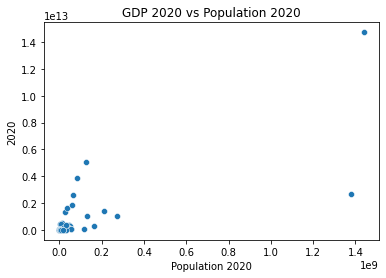

In [227]:
# 2 different sources
sns.scatterplot(x=df_final['Population 2020'], y=df_final['2020'])
plt.title("GDP 2020 vs Population 2020")
plt.show()

This graph illustrates the GDP vs Population of countries in 2020.

## Visualization 2: Fertility Rate vs Population 2020

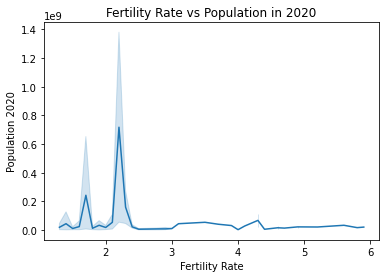

In [234]:
sns.lineplot(x=df_final['Fertility Rate'], y=df_final['Population 2020'])
plt.title('Fertility Rate vs Population in 2020')
plt.show()

This graph illustrating fertility rate compared to population shows that higher fertility rates don't necessarily mean high population. 

## Visualization 3: Median Age of Countries

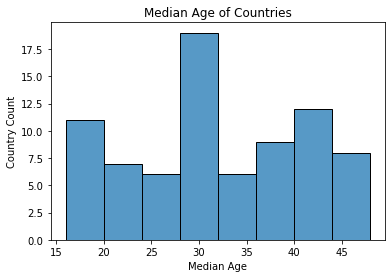

In [229]:
sns.histplot(df_final['Median Age'], bins='auto')
plt.title('Median Age of Countries')
plt.ylabel('Country Count')
plt.show()

Based off this histogram we can clearly see most countries have a median age of 30.

## Visualization 4: Median Age vs GINI Index

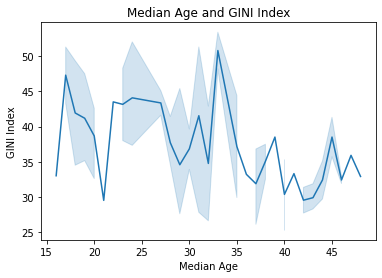

In [230]:
# 2 different sources
sns.lineplot(x=df_final['Median Age'], y=df_final['GINI Index'])
plt.title('Median Age and GINI Index')
plt.show()

This graph shows the relationship between a country's Median Age and it's GINI Index (Level of Income Inequality). It shows that countries with a Median Age of 34 have the highest GINI ratio while countries with very low Median Ages also show higher levels of income inequality.

## Visualization 5: World Population Pie Chart

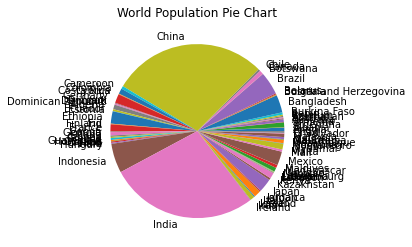

In [231]:
plt.pie(data = df_final, x='Population 2020', labels = 'Country (or dependency)')
plt.title('World Population Pie Chart')
plt.show()

This pie chart confirms the common knowledge that India and China make up a large portion of the World population though they may be unproportional here due to missing data.

In [235]:
#close SQL connection
conn.close()

# Conclusion:

This project greatly expanded my knowledge of data science by allowing me to tackle new challenges. Throughout this project I was able to source my own data through multiple different sources rather than using provided flat files. I was able to expand my knowledge of data cleaning through every milestone fixing null values, formatting issues and other areas that needed to be addressed to prepare the data for merging starting out with cleaning a Flat file in Milestone 2. Another thing I gained comfortability with from this course was web scraping as in Milestone 3 I parsed the HTML from Worldometer’s World Population 2020 page to pull a table on the World population by country and convert it into a Pandas data frame to work with. Gaining more comfortability with APIs was also helpful as they are commonly used in the real world to get data from Vendors or other departments. In Project Milestone 4 I had to work through a challenge of IMF’s API being touchy and returning very complex JSON data when pulling multiple countries. Although I was unable to get it to work it was a great opportunity to face a real-world problem and then use an API to another data source (“rest countries”) to get relevant data and pull it into a dataframe as well for data cleaning. I feel like one area I greatly improved my knowledge in this semester was SQL. In addition to being able to use it in Python through SQLite3 and knowing how the two can interact I took it upon myself to find courses on SQL to expand my ability to source my own data at work. 


In addition to building on some technical skills, I was able to learn more about the ethical considerations that go into every data science project. In any data science project, you must consider multiple things such as whether the data is ethically sourced, whether your data cleaning will end up misleading the stakeholders or if the end results end up providing a negative impact for certain demographics. An example of how this might impact my project would be that if the project I am presenting on country data is used by an international body to determine aid based on a country’s GINI Index (Level of Income Inequality in a Country), the data represented shows that younger countries which typically are developing nations have high income inequality so they would receive less aid.